In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/rock_density_xray.csv')

In [4]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [5]:
df.columns = ['Signal', 'Density']

In [6]:
df.columns

Index(['Signal', 'Density'], dtype='str')

<Axes: xlabel='Signal', ylabel='Density'>

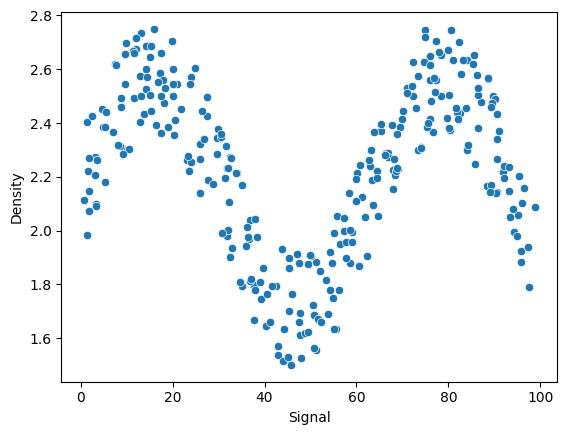

In [7]:
sns.scatterplot(x='Signal', y='Density', data=df)

In [13]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101) 

In [ ]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

In [35]:
def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    print(f'RMSE: {root_mean_squared_error(y_test, preds)}')
    print(f'MAE: {mean_absolute_error(y_test, preds)}')

    signal_range = np.arange(0, 100)
    signal_preds = model.predict(signal_range.reshape(-1, 1))
    
    plt.figure(figsize=(12,8), dpi=200)
    sns.scatterplot(x='Signal', y='Density', data=df, color='black')

    plt.plot(signal_range, signal_preds)

RMSE: 0.13807520083403252
MAE: 0.11969168049270058


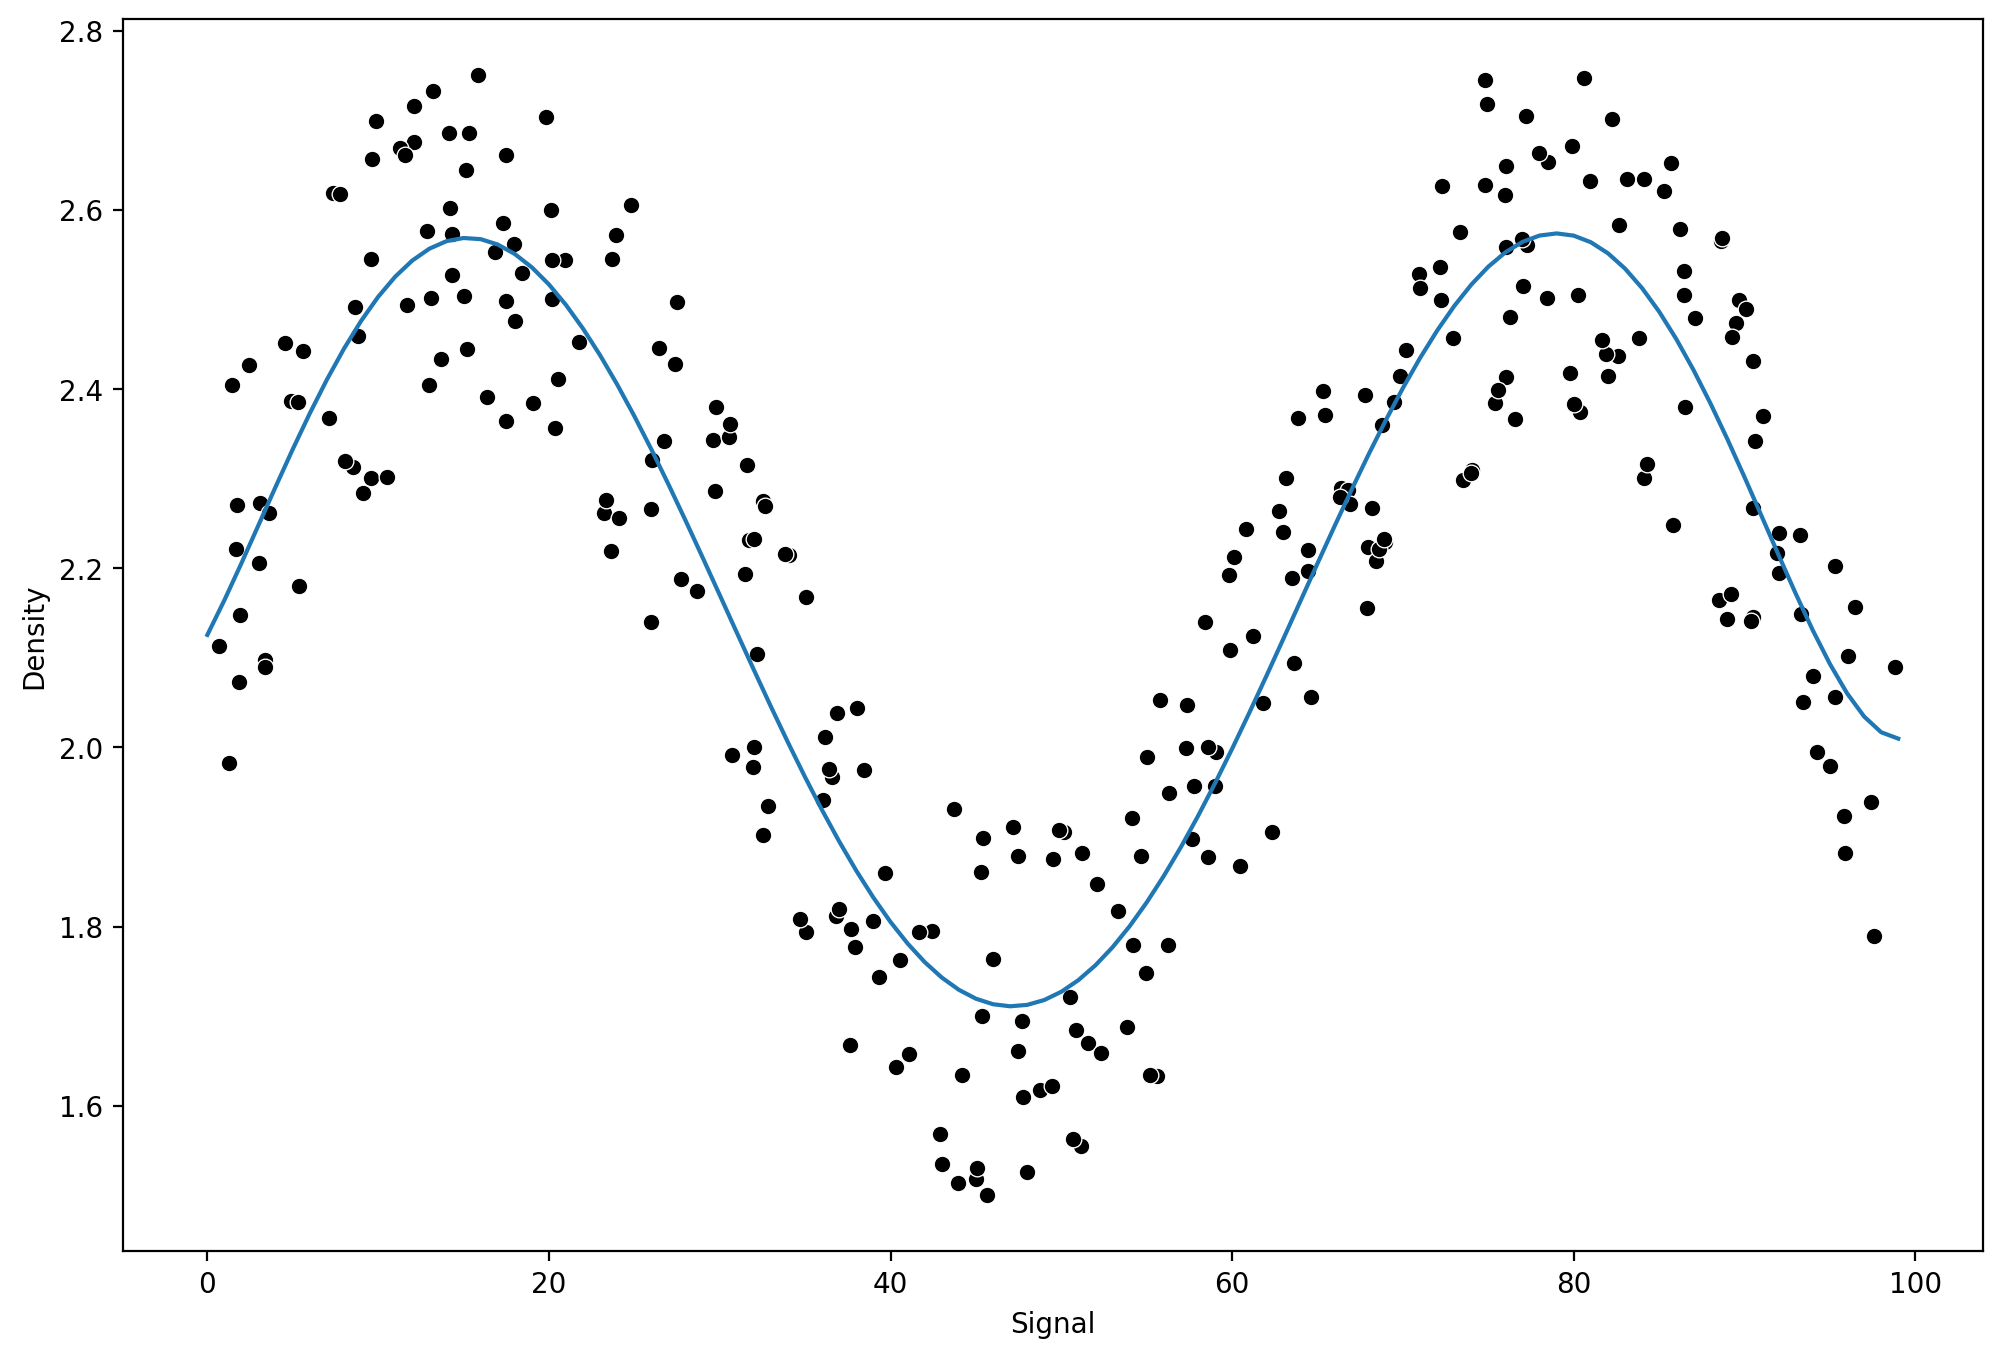

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression


pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)

In [46]:
from sklearn.neighbors import KNeighborsRegressor

RMSE: 0.1523487028635337
MAE: 0.11877297474442378
RMSE: 0.13730685016923647
MAE: 0.12198383614100558
RMSE: 0.13277855732740926
MAE: 0.11635971693292672
RMSE: 0.151321497164368
MAE: 0.12878322504026188


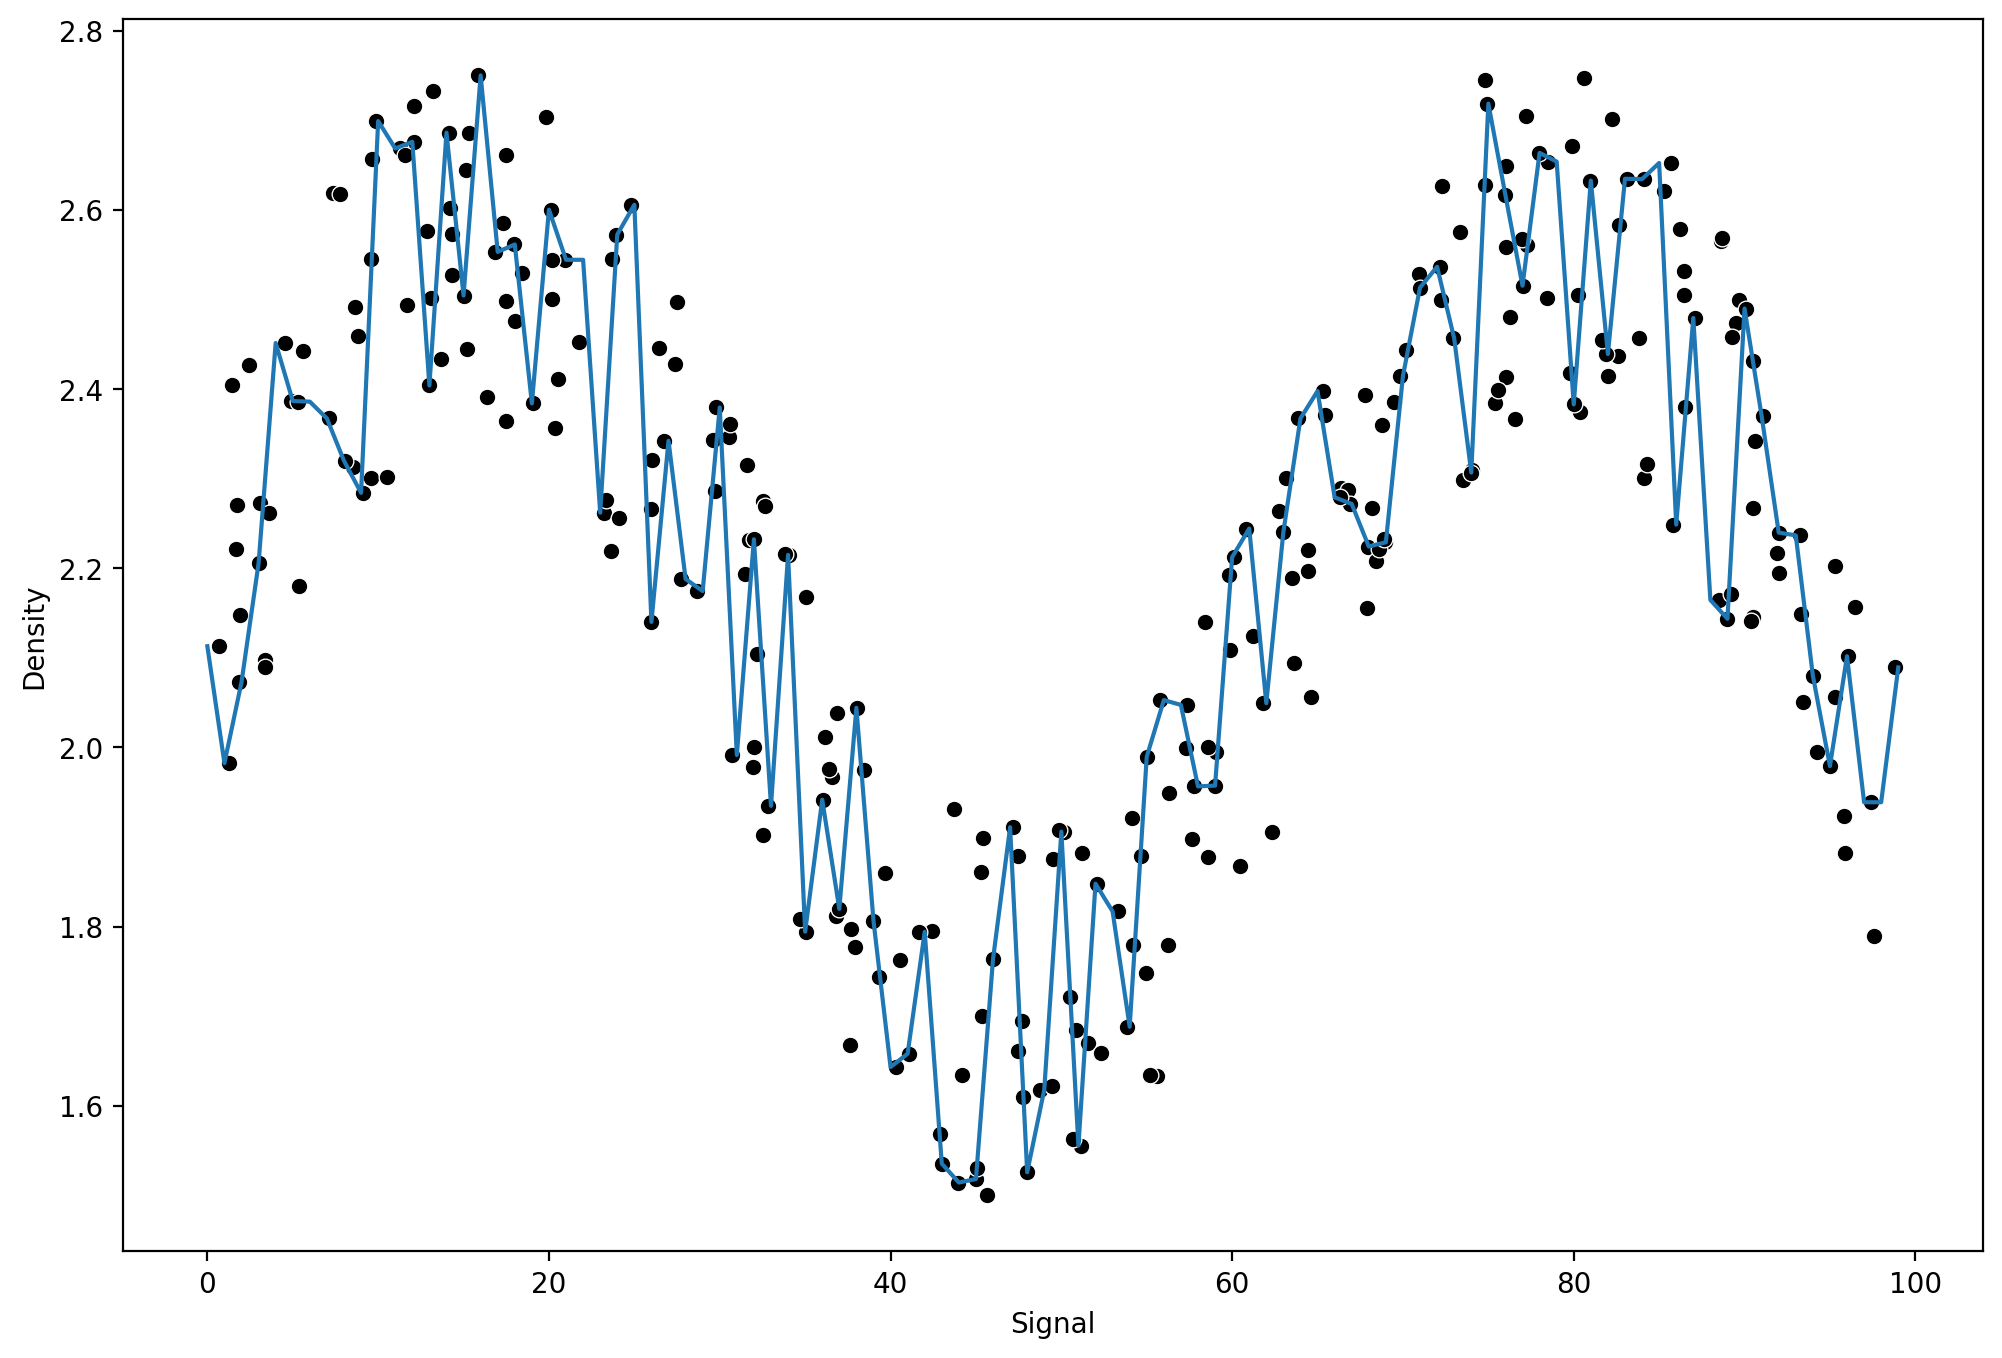

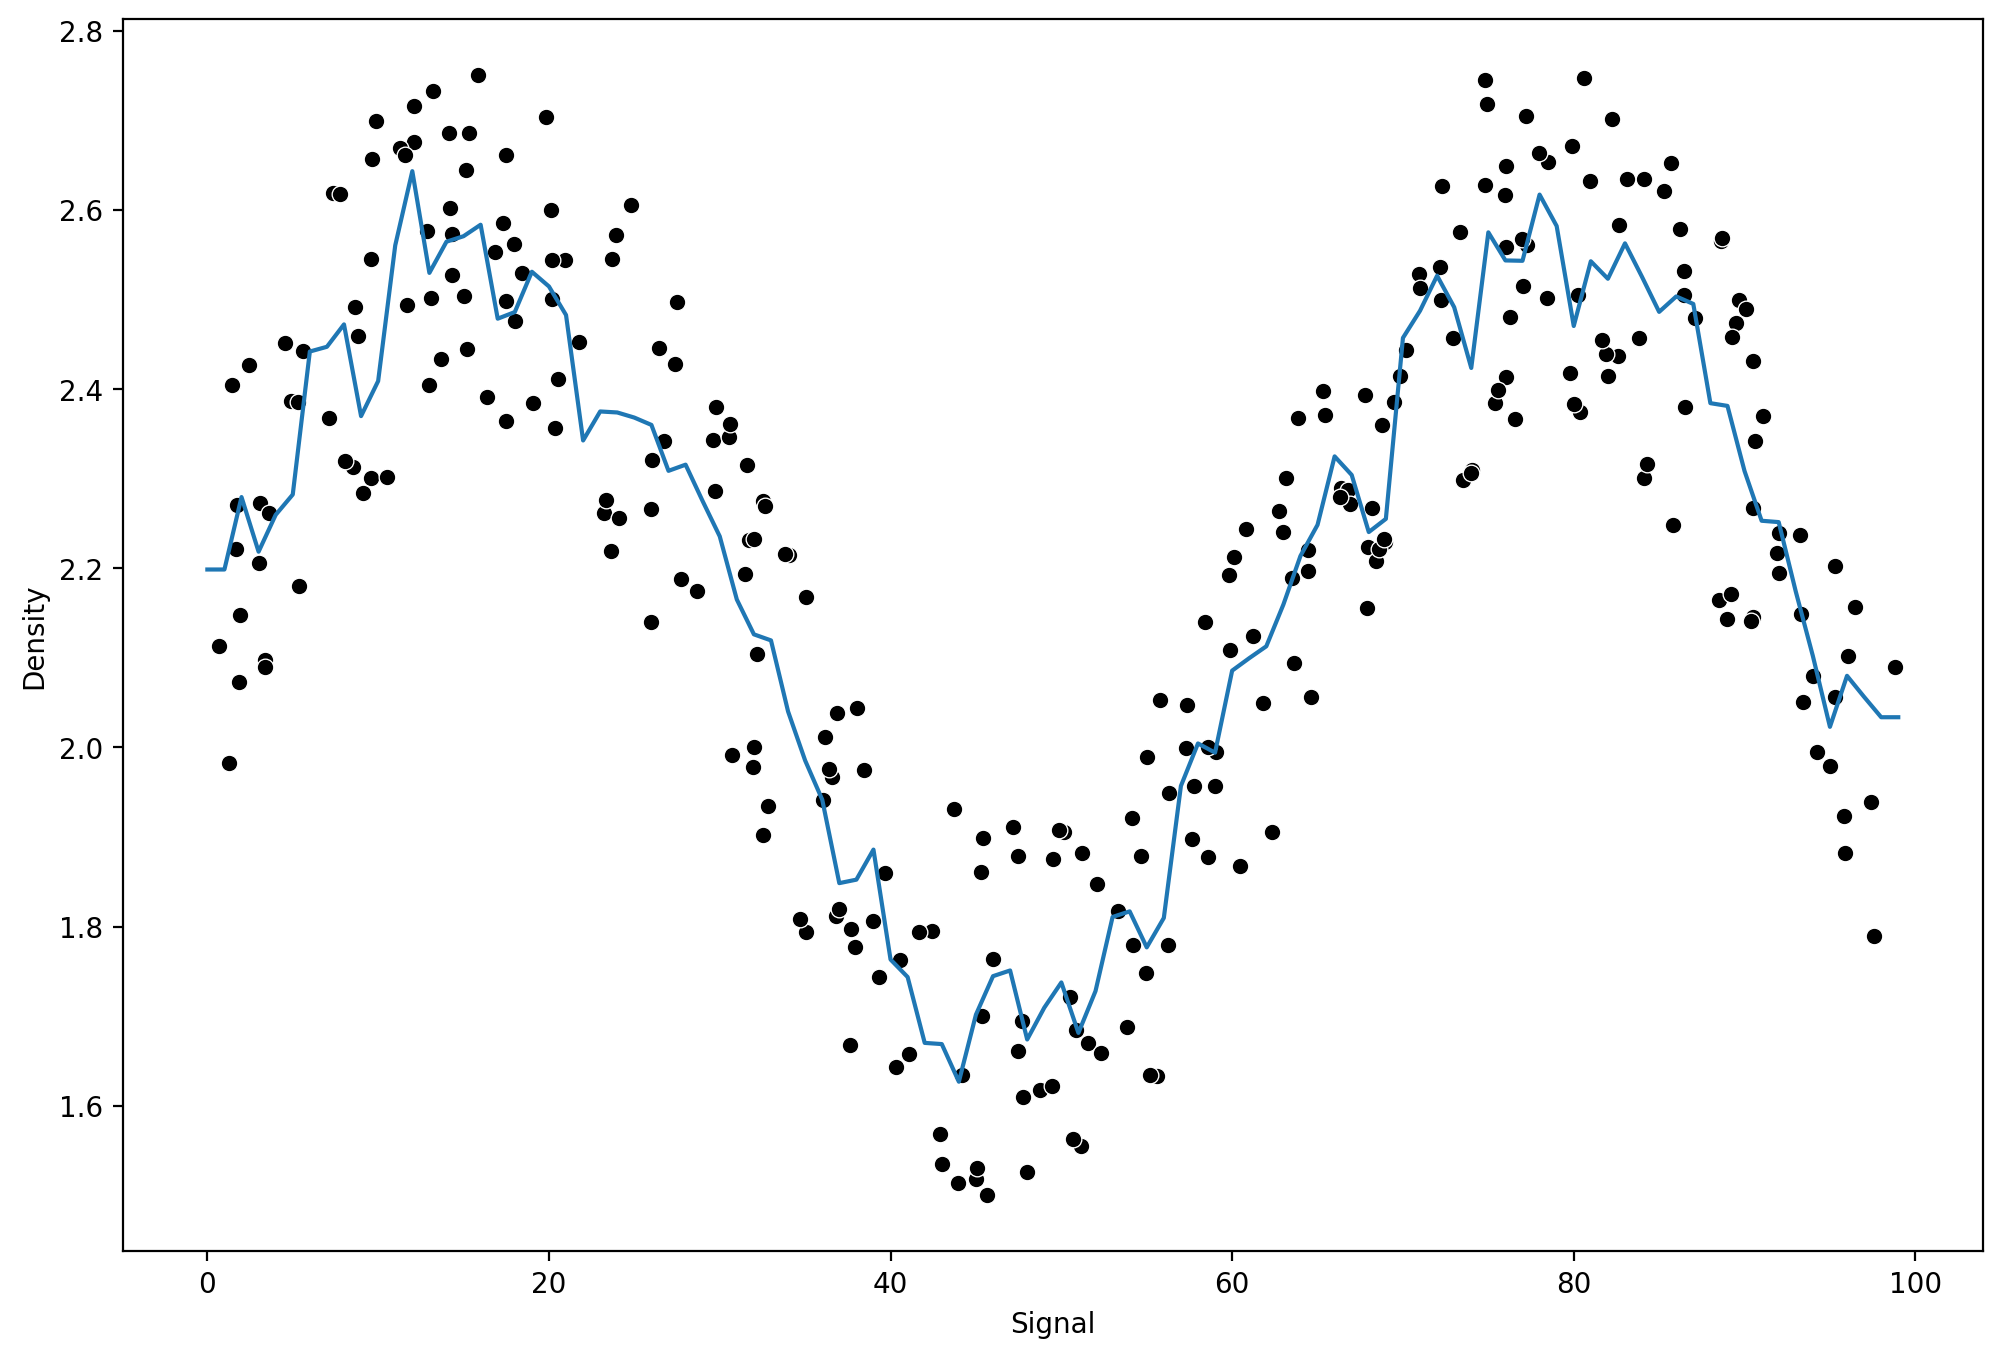

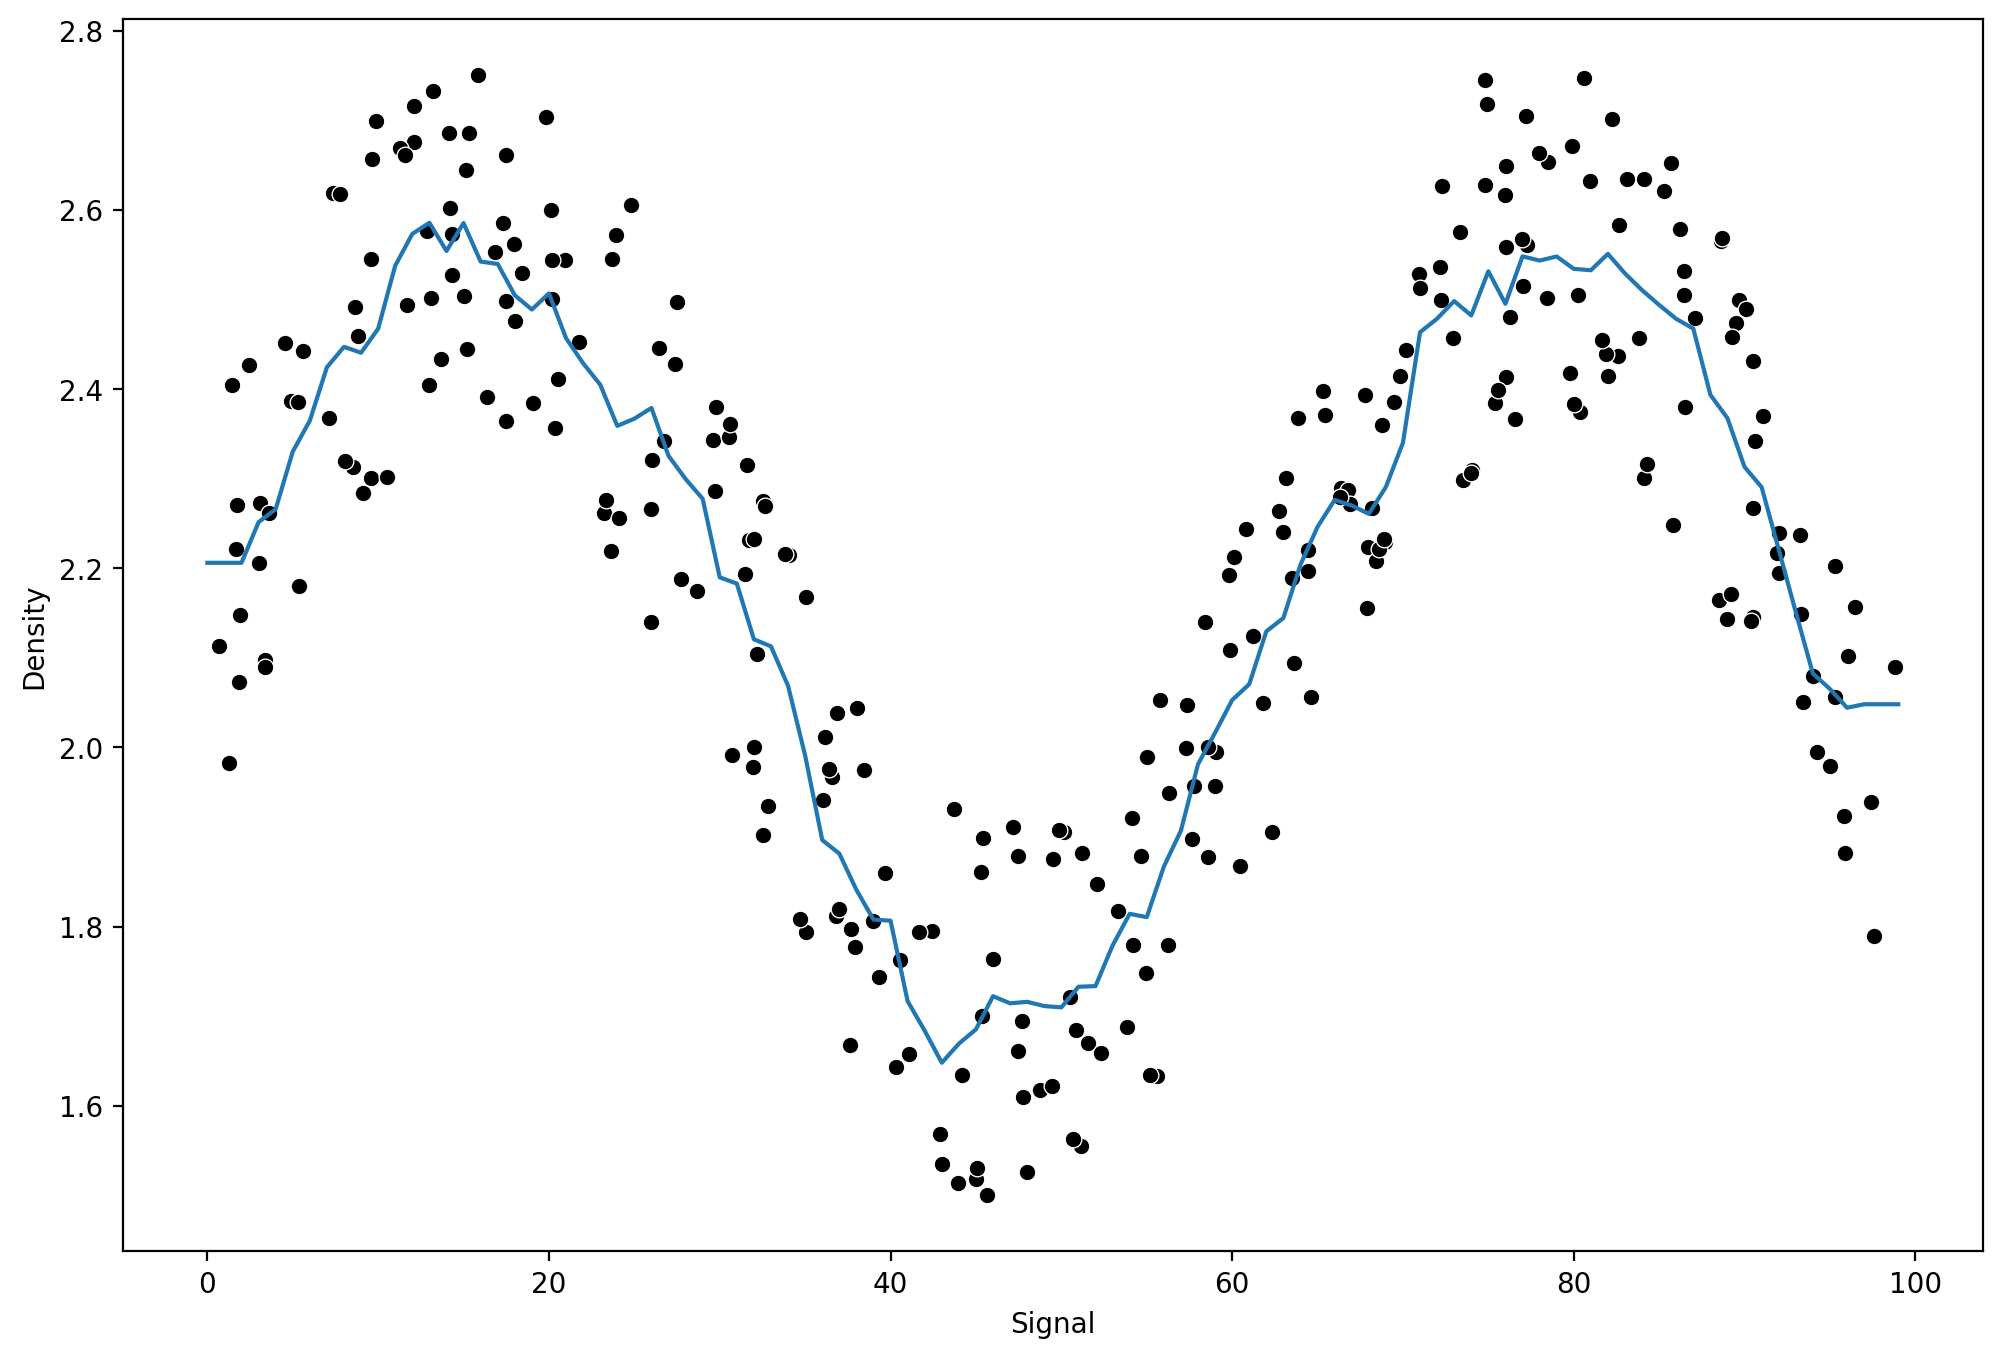

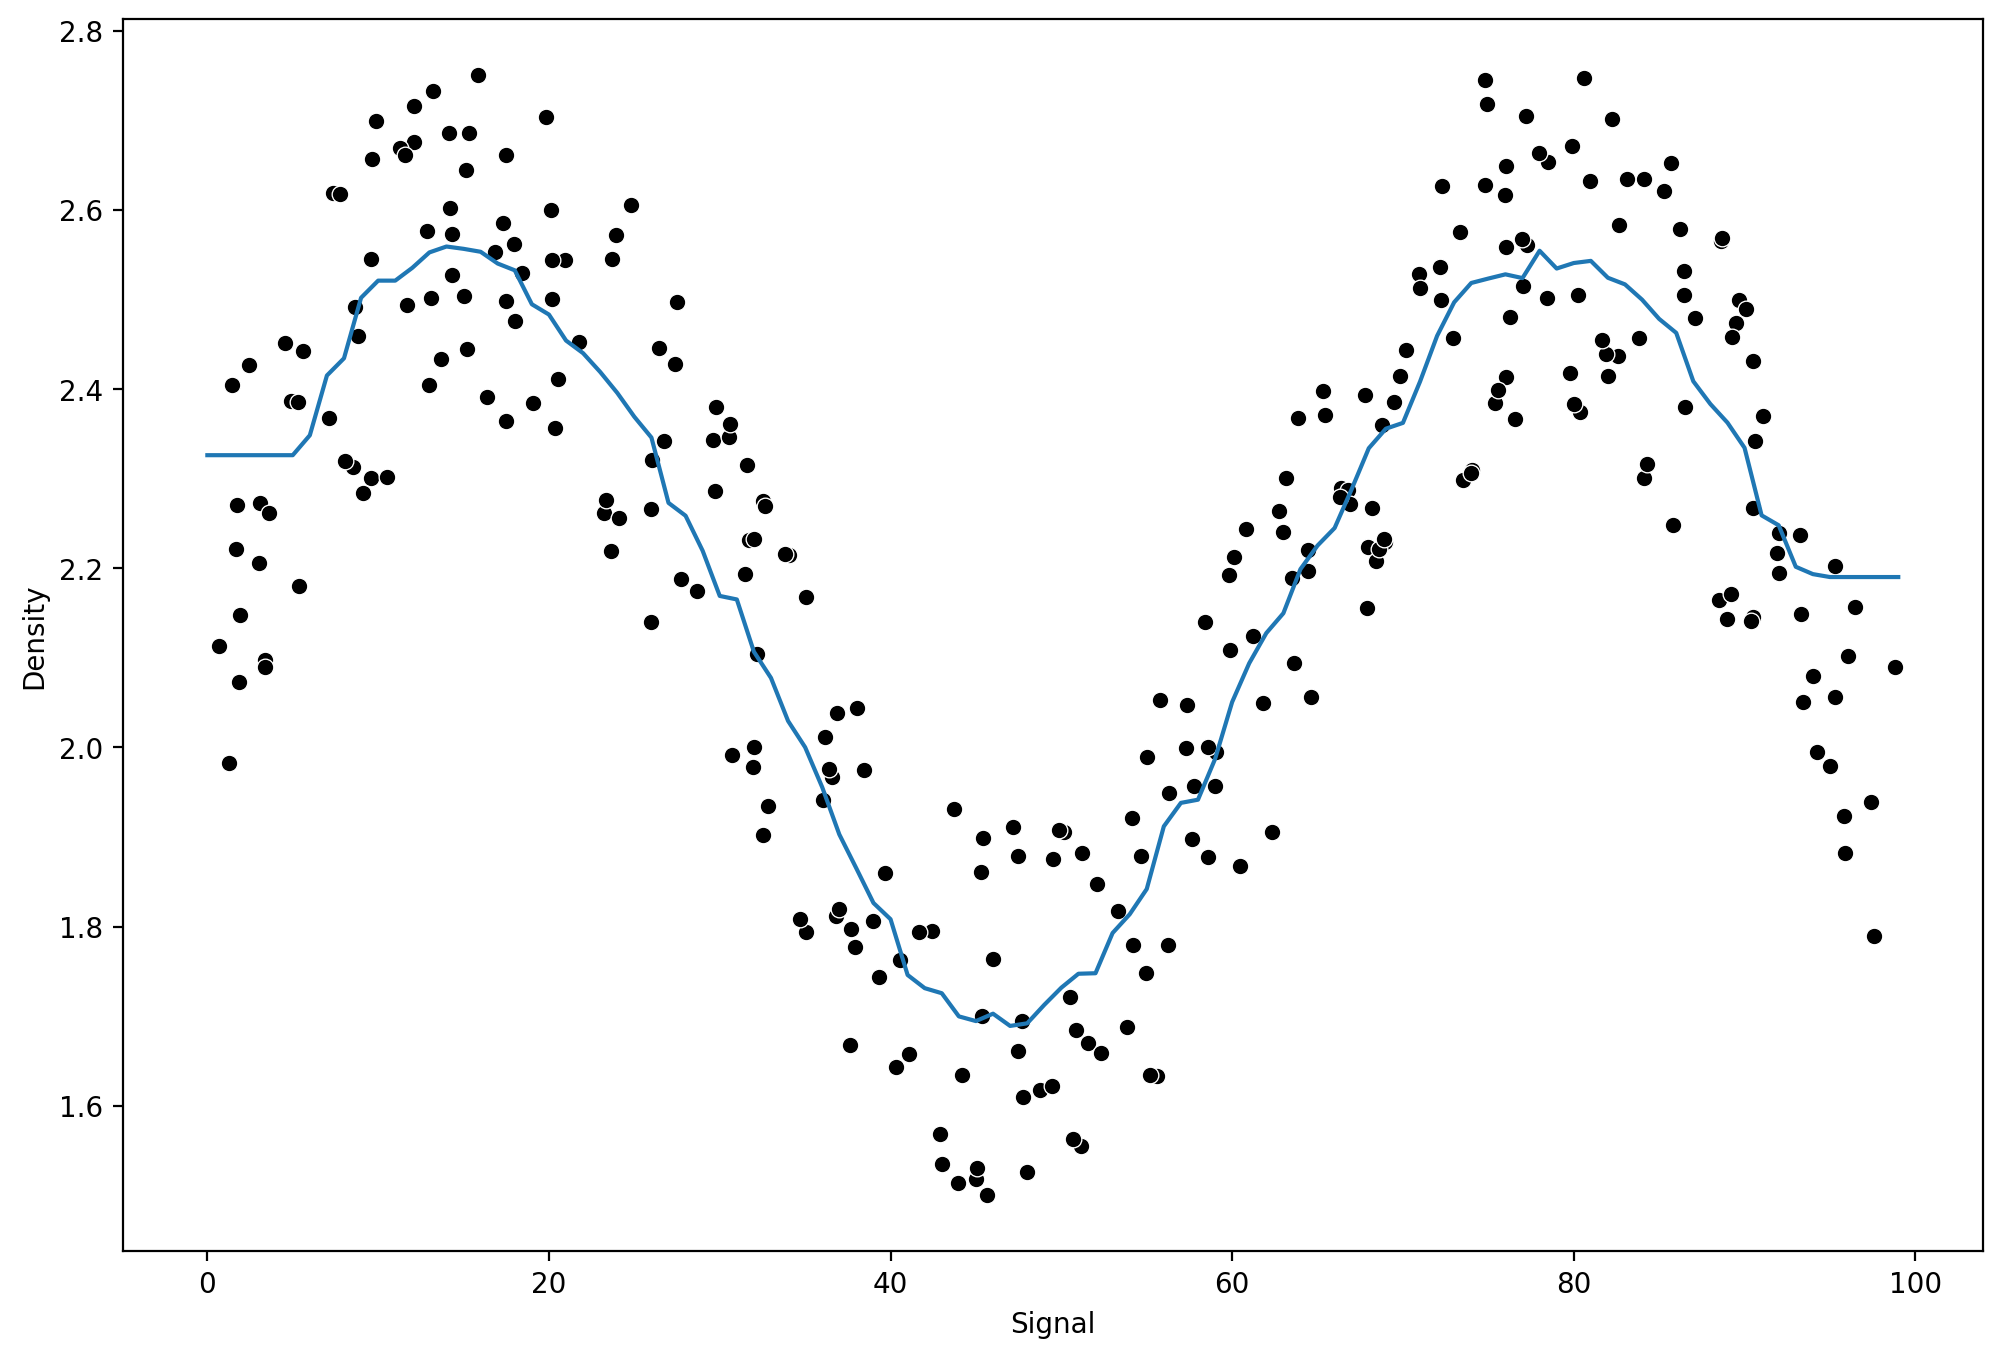

In [51]:
k_values = [1, 5, 10, 25]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, y_train, X_test, y_test)

In [52]:
from sklearn.tree import DecisionTreeRegressor

RMSE: 0.1523487028635337
MAE: 0.11877297474442378


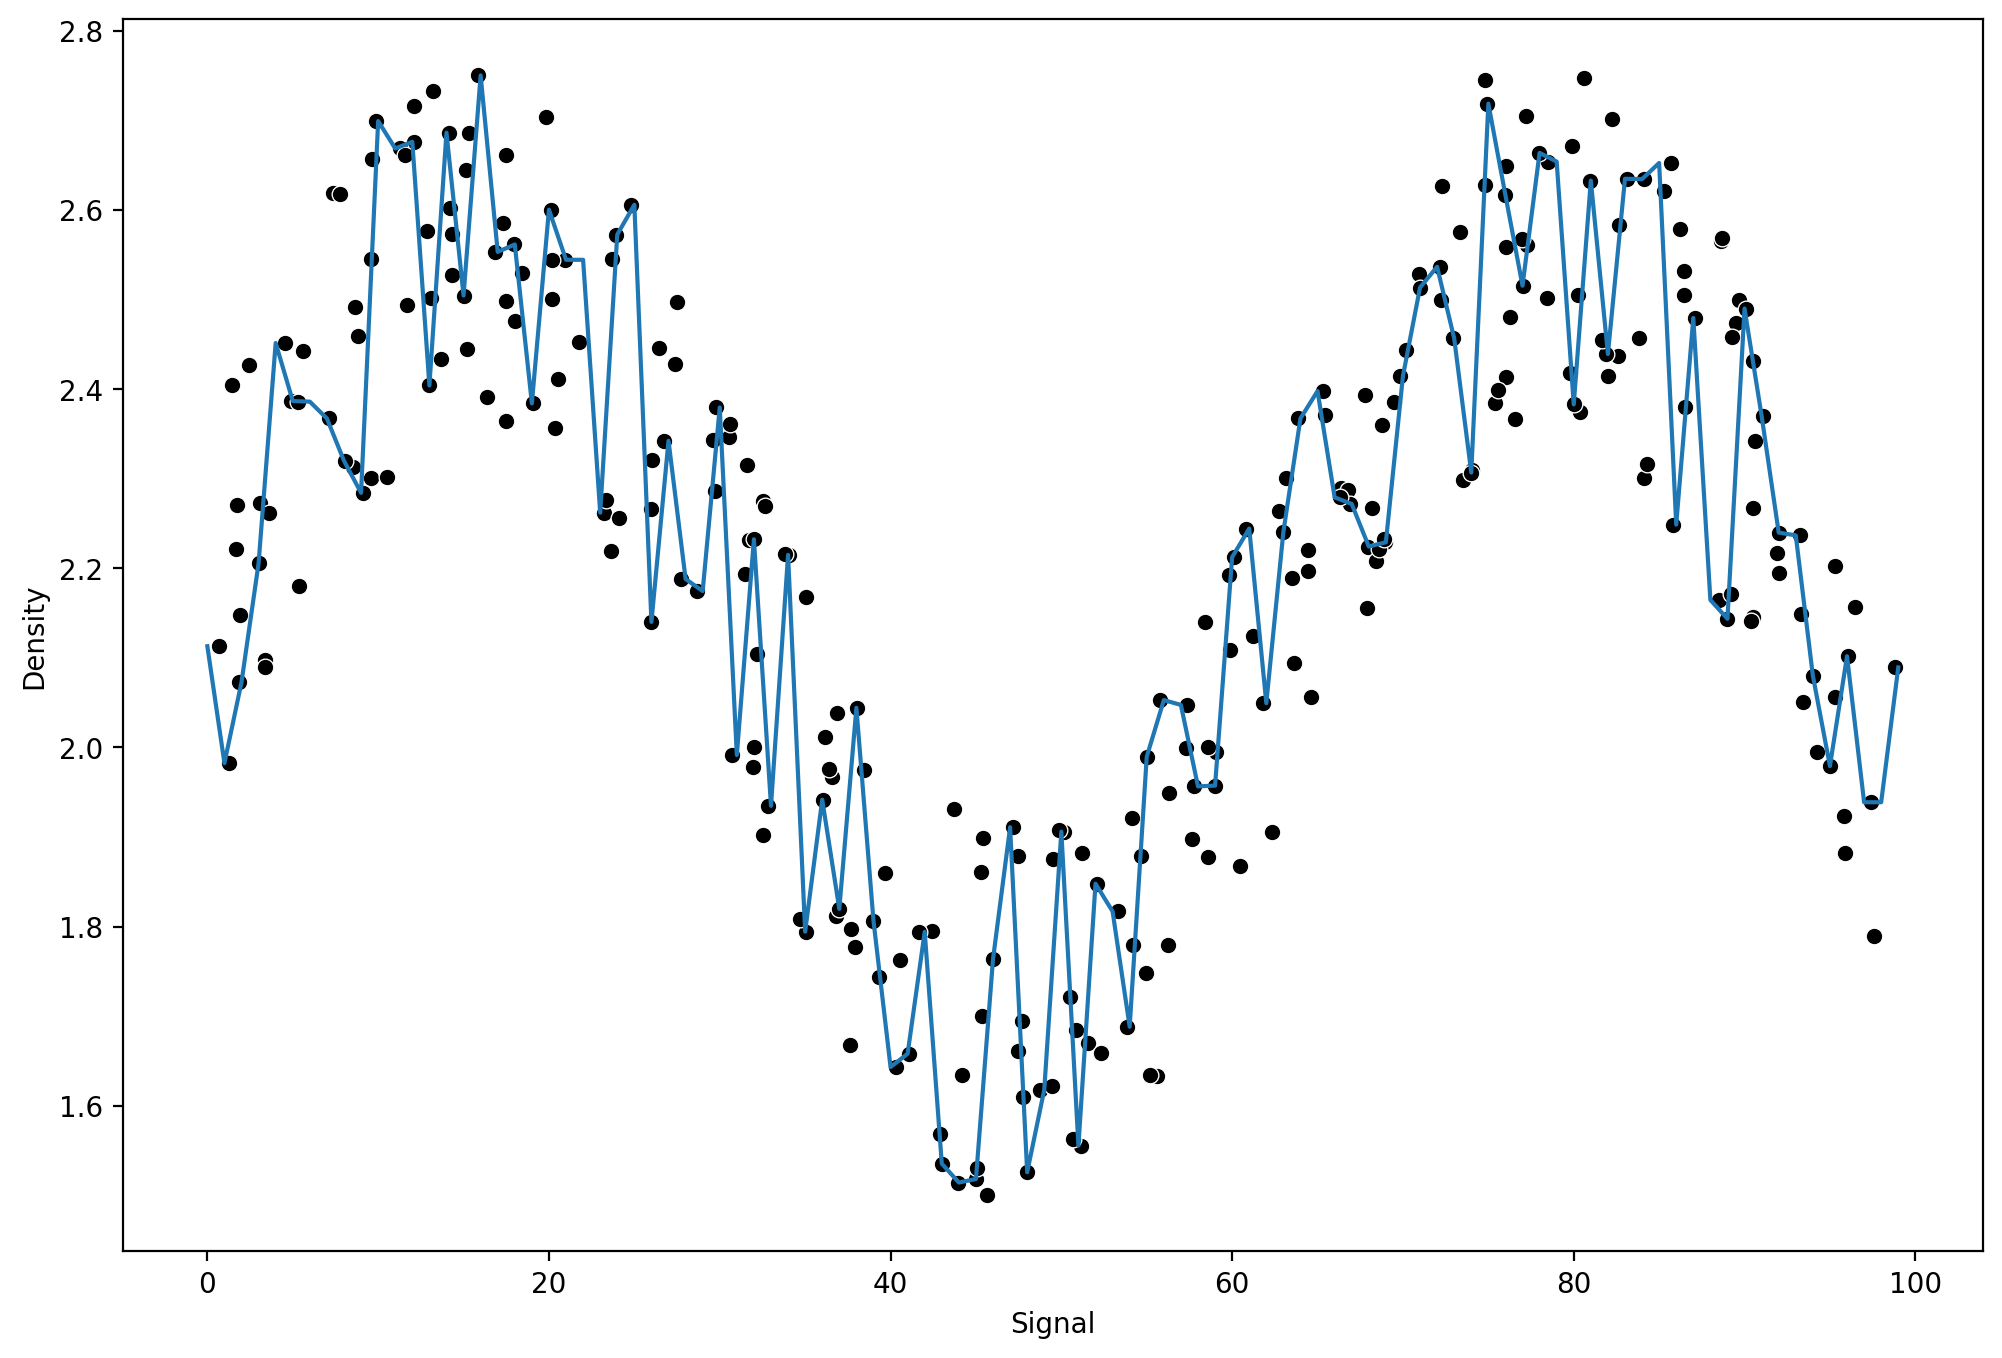

In [53]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

In [54]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [56]:
svr = SVR()
param_grid = {
    'C': [0.01, 0.1, 1, 5, 10, 100, 1000],
    'gamma':['auto', 'scale']
}

grid = GridSearchCV(svr, param_grid)

RMSE: 0.12646999302046696
MAE: 0.10854210121348368


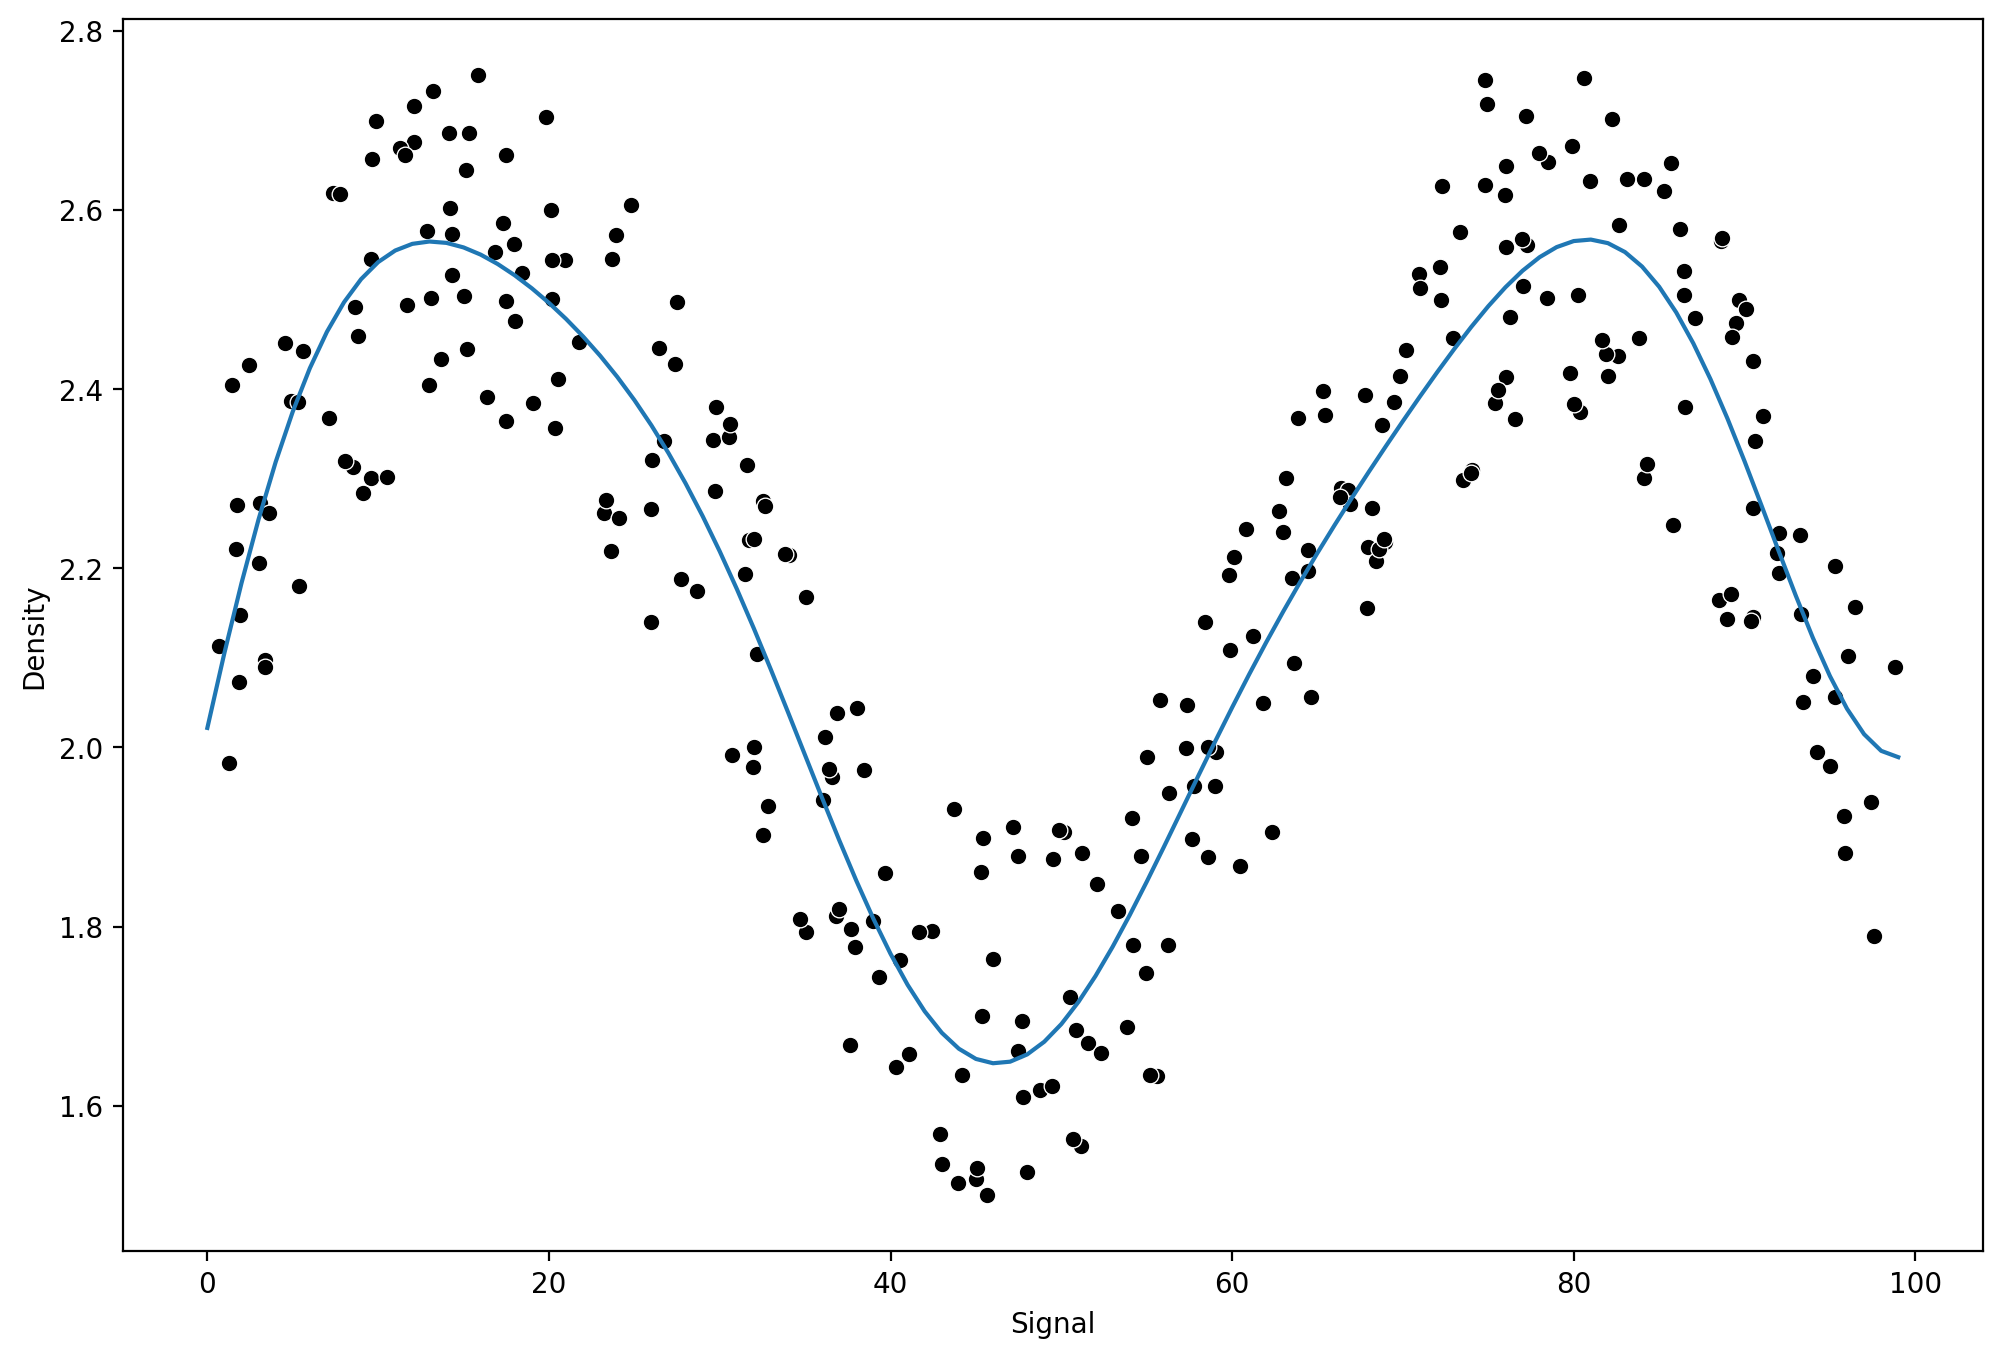

In [57]:
run_model(grid, X_train, y_train, X_test, y_test)

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rfr = RandomForestRegressor(n_estimators=10)

RMSE: 0.13228501765929446
MAE: 0.10998505159296432


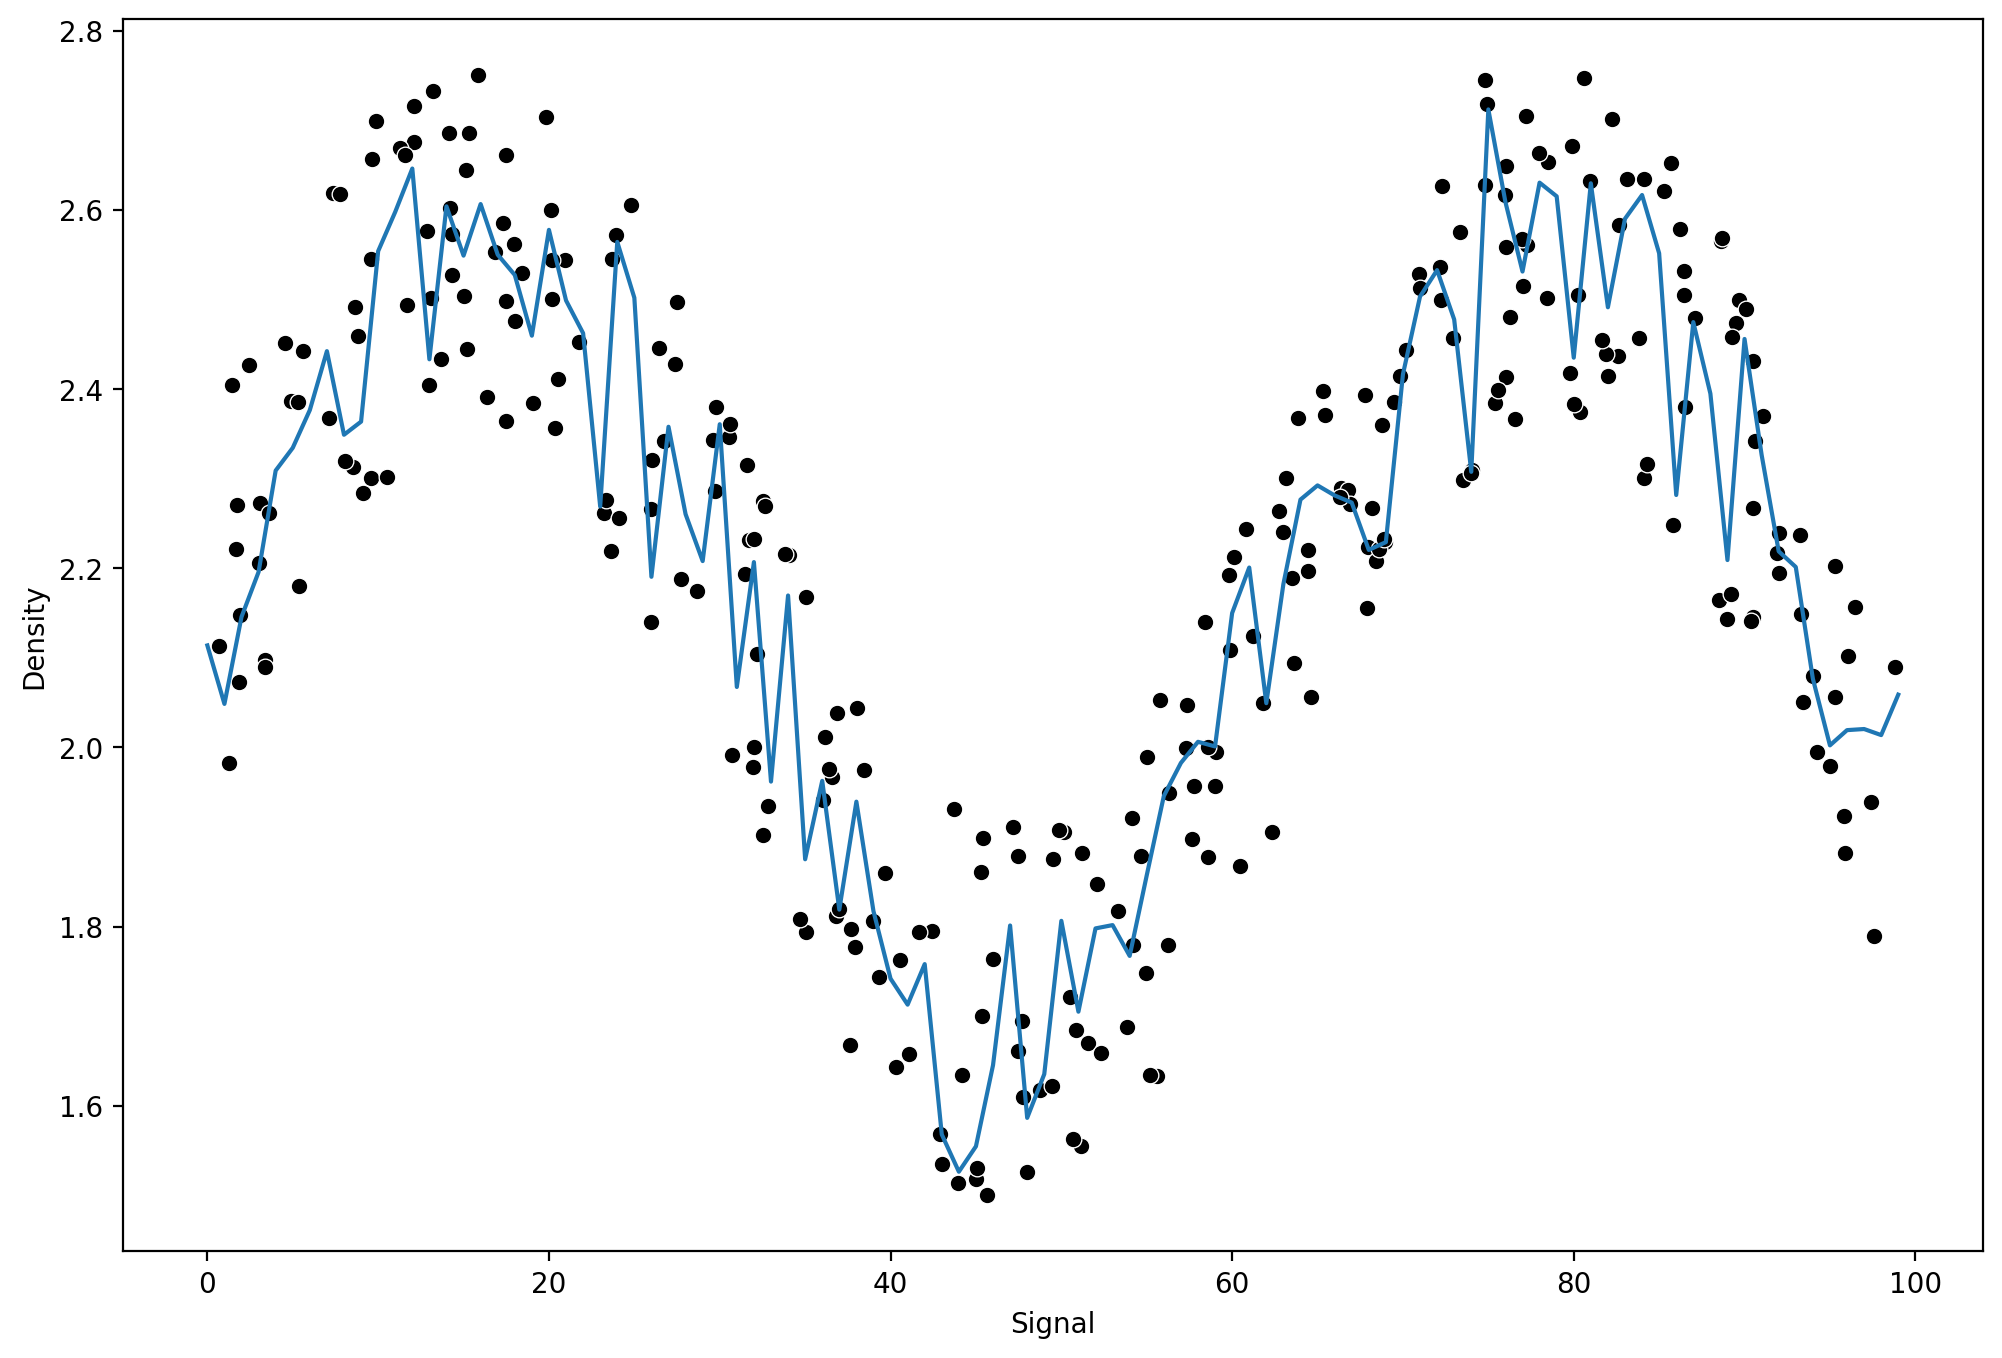

In [60]:
run_model(rfr, X_train, y_train, X_test, y_test)

In [63]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

In [ ]:
model = GradientBoostingRegressor()
run_model(model, X_train, y_train, X_test, y_test)